<a href="https://colab.research.google.com/github/RRaakha/Data-Science-Internship/blob/main/Sales_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the Data**

In [1]:
import pandas as pd #to import the dataset
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
df.isna().sum() # to check for null values

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


**Explore the Data**

In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.duplicated().any() # to check for dulpicated values

False

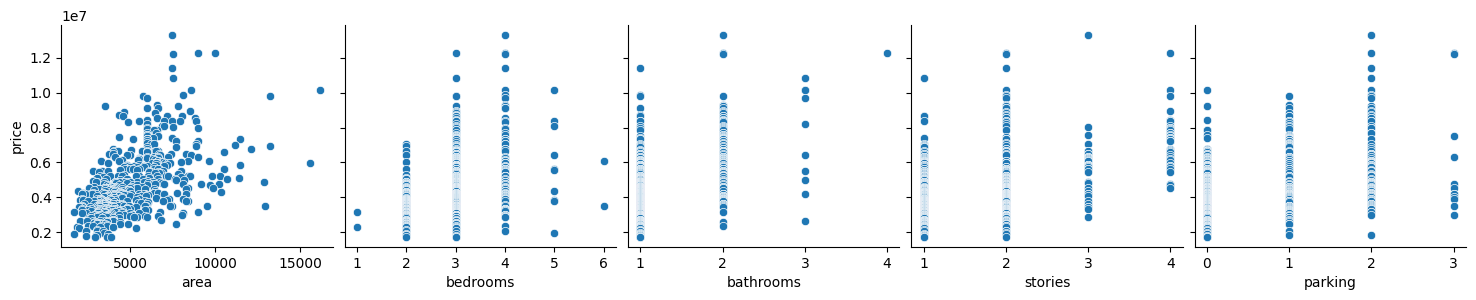

In [7]:
# Let's see how Prices are related with other variables using scatter plot.
import seaborn as sns
sns.pairplot(df, x_vars=['area', 'bedrooms', 'bathrooms','stories','parking'], y_vars='price', height=3, aspect=1, kind='scatter')
plt.show()


In [8]:
df[['price','area','bedrooms','bathrooms','stories','parking']].corr()  # to create a correlation matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

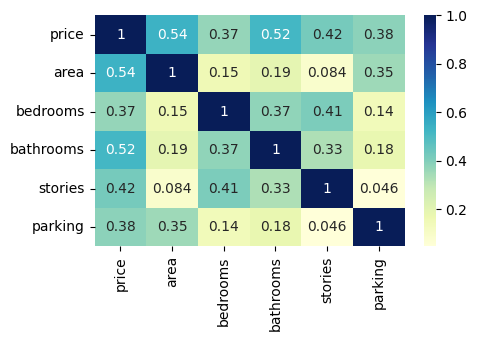

In [9]:
plt.figure(figsize=(5,3)) # to create a correlation heatmap
sns.heatmap(df[['price','area','bedrooms','bathrooms','stories','parking']].corr(), cmap="YlGnBu",annot =True)

In [10]:
x = df[['area']]
y = df['price']

**Instantiating The Model**

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.3)

In [12]:
model.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred = model.predict(x_test) #to get the predictions for the testing set
y_pred

array([7373800.78124317, 3639462.31671121, 3965793.99225984,
       4304146.0705913 , 4633594.14686141, 5310298.30352433,
       5982550.45915658, 4086888.42029426, 5003110.23240761,
       5337010.30970839, 4847290.19633391, 3360321.85208776,
       3765008.74577631, 4313050.07265266, 3867849.96958495,
       4339762.07883672, 3520593.88919213, 4993315.83014012,
       4535650.12418651, 5871250.43338965, 3750317.14237507,
       4571266.13243193, 9343811.23731779, 4161682.03760964,
       8275330.98995529, 3947985.98813714, 5256874.29115621,
       3814425.95721682, 3353643.85054174, 4402090.0932662 ,
       5604130.37154902, 4014766.00359729, 3974697.9943212 ,
       5817826.42102152, 5003110.23240761, 5270230.29424824,
       5826730.42308288, 3965793.99225984, 6218506.51378246,
       5292490.29940162, 4321954.07471401, 5069890.24786777,
       3467169.87682401, 8161359.76356995, 5483926.34372074,
       3867849.96958495, 4199969.24647346, 6138370.49523027,
       4402090.0932662 ,

In [14]:
model.intercept_.round(2)

2398689.63

In [15]:
model.coef_.round(2)

array([445.2])

To examine model performance by visually comparing the fitted line and the true observation in the test set.

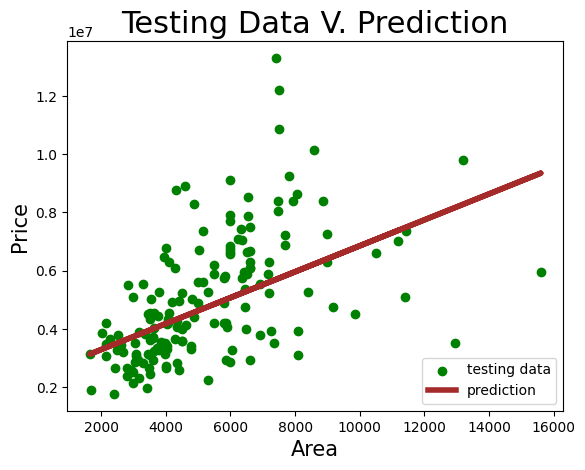

In [16]:
%matplotlib inline
plt.scatter(x_test,y_test, label = 'testing data', color ='green')
plt.plot(x_test,y_pred, label = 'prediction', linewidth=4, color = 'brown' )
plt.xlabel('Area',color ='black', size =15)
plt.ylabel('Price', color ='black',size =15)
plt.title('Testing Data V. Prediction', color ='black', size=22)
plt.legend(loc='lower right');

To examine model performance by visually comparing the fitted line and the true observation in the train set.


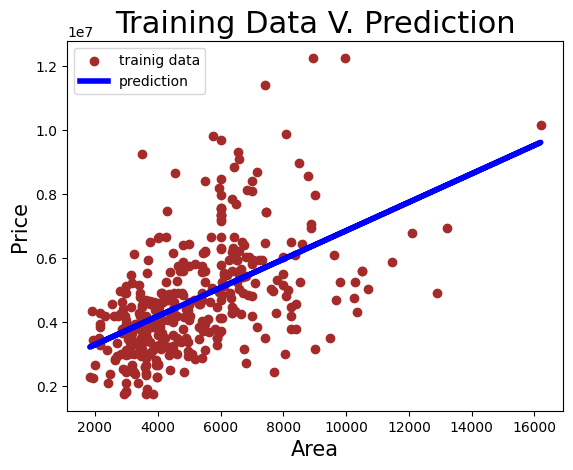

In [17]:
%matplotlib inline
plt.scatter(x_train,y_train, label = 'trainig data', color ='brown')
plt.plot(x_train,model.predict(x_train), label = 'prediction', linewidth=4, color = 'blue' )
plt.xlabel('Area', color ='black', size =15)
plt.ylabel('Price', color ='black',size =15)
plt.title('Training Data V. Prediction', color ='black', size=22)
plt.legend(loc='upper left');

**Residual** is the difference between the observed value of the target and the predicted value.

In [18]:
residuals = y_test- y_pred
residuals

,price
64,-3.738008e+05
523,-1.259462e+06
246,5.842060e+05
370,-6.641461e+05
72,2.086406e+06
...,...
345,5.542322e+05
140,7.591498e+05
331,-1.710842e+06
407,1.113561e+05


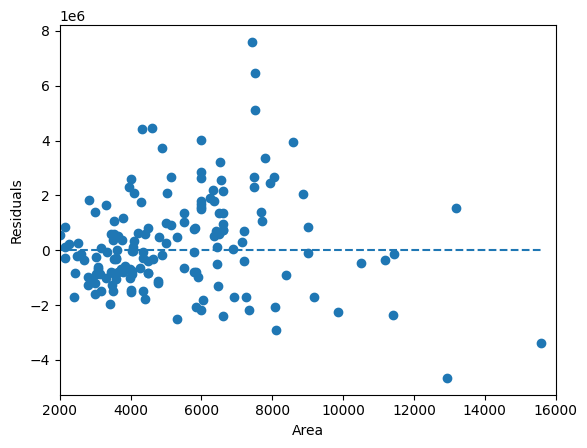

In [19]:
plt.scatter(x_test, residuals)
plt.hlines(y=0, xmin=x_test.min(), xmax=x_test.max(), linestyle='--')
plt.xlim((2000,16000))
plt.xlabel('Area')
plt.ylabel('Residuals');

In [21]:
residuals.mean()

249297.97943767614

In [23]:
(residuals**2).mean()

3218095941927.434

In [24]:
from sklearn.metrics import mean_squared_error # To calculate the mean squared error
mean_squared_error(y_test,y_pred)

3218095941927.434

In [25]:
(residuals**2).sum()

527767734476099.2